<img src='https://img.rankedboost.com/wp-content/uploads/2016/07/Pokemon-Go-Pok%C3%A9dex.png' style='height:400px'>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
init_notebook_mode(connected=True)
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-images-dataset/pokemon/pokemon/133.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/397.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/466.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/499.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/223.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/383-primal.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/421-sunshine.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/656.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/34.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/313.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/120.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/482.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/596.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/100.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/128.png
/kaggle/input/pokemon-images-dataset/pokemon/pokemon/164.png
/kaggle/i

/kaggle/input/pokemon-images-and-types/images/images/natu.png
/kaggle/input/pokemon-images-and-types/images/images/mismagius.png
/kaggle/input/pokemon-images-and-types/images/images/combee.png
/kaggle/input/pokemon-images-and-types/images/images/sewaddle.png
/kaggle/input/pokemon-images-and-types/images/images/chansey.png
/kaggle/input/pokemon-images-and-types/images/images/ivysaur.png
/kaggle/input/pokemon-images-and-types/images/images/klinklang.png
/kaggle/input/pokemon-images-and-types/images/images/larvesta.png
/kaggle/input/pokemon-images-and-types/images/images/pelipper.png
/kaggle/input/pokemon-images-and-types/images/images/charmeleon.png
/kaggle/input/pokemon-images-and-types/images/images/sableye.png
/kaggle/input/pokemon-images-and-types/images/images/lumineon.png
/kaggle/input/pokemon-images-and-types/images/images/cubchoo.png
/kaggle/input/pokemon-images-and-types/images/images/vespiquen.png
/kaggle/input/pokemon-images-and-types/images/images/tapu-bulu.jpg
/kaggle/input/

<div class="list-group" id="list-tab" role="tablist">
  <h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">&nbsp;Summary:</h1>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile">1. Introduction<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages">2. Data <span class="badge badge-primary badge-pill">2</span></a>
   <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="messages">3. Model<span class="badge badge-primary badge-pill">3</span></a>
   <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="messages">4. Data Augmentation<span class="badge badge-primary badge-pill">4</span></a>
</div>

<a id="1"></a> <br>
<font size="+3" color="black"><b>1 - Introduction</b></font><br><a id="1"></a>
<br> 

* the purpose of this kernel is to be fun and to test the use of a convolutional neural network in the identification of pokemon we know that pokemon usually has characteristics of animals that belong to their types and very striking colors such as, for example, fire pokemons are usually red already the grass ones are green the dark ones are black and so on, so it usually has striking features to represent its types, but this is not always confirmed as in the following examples:


<img src='https://images.uncyc.org/pt/thumb/d/df/Octilery.png/230px-Octilery.png' style='height:100px'>

* Octilery: it is a water type pokemon but has striking red colors its water features are striking because the pokemon is an octopus.


<img src='https://assets.pokemon.com/assets/cms2/img/pokedex/full/324.png' style='height:150px'>

* Torkoal: it is a turtle pokemon but its fire type which draws attention to its flame shape is the fact that it is a turtle with a volcano on its back.



* But how we see that pokemon of diferents types can be similiar, we can have we also have pokemon with big differences between them:

<img src='https://cdn.bulbagarden.net/upload/thumb/f/fe/055Golduck.png/250px-055Golduck.png' style='height:150px'>


<img src='https://assets.pokemon.com/assets/cms2/img/pokedex/full/077.png' style='height:150px'>

* So let's evaluate the performance of a CNN in classifying pokemon types based only on its images and 

<a id="2"></a> <br>
<font size="+3" color="black"><b>2 - Data</b></font><br><a id="2"></a>
<br> 

* prepare our data to train CNN, lets merge each pokemons type with your image and construct the data set

In [2]:
pokemons = pd.read_csv('/kaggle/input/pokemon-images-and-types/pokemon.csv')
numbers = []
for i in range(1,pokemons.shape[0]+1):
    numbers.append(i)
pokemons['pkn'] = numbers
IMG_DIR = '/kaggle/input/pokemon-images-dataset/pokemon/pokemon'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(IMG_DIR) if isfile(join(IMG_DIR, f))]

In [3]:
import re
dataframe_img = pd.DataFrame([])
images = []
pokemon_number = []
for img in onlyfiles:
    if not re.search('-', img):
        pkn = img.split('.')
        n = re.sub("[^0-9]", "", pkn[0])
        path = IMG_DIR +'/' +str(img)
        images.append(path)
        pokemon_number.append(n)
dataframe_img['images'] = images
dataframe_img['pkn'] = pokemon_number
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
result = pokemons.merge(dataframe_img, left_on='pkn', right_on='pkn')
result.head()

,Name,Type1,Type2,pkn,images
0,bulbasaur,Grass,Poison,1,/kaggle/input/pokemon-images-dataset/pokemon/p...
1,ivysaur,Grass,Poison,2,/kaggle/input/pokemon-images-dataset/pokemon/p...
2,venusaur,Grass,Poison,3,/kaggle/input/pokemon-images-dataset/pokemon/p...
3,charmander,Fire,NaN,4,/kaggle/input/pokemon-images-dataset/pokemon/p...
4,charmeleon,Fire,NaN,5,/kaggle/input/pokemon-images-dataset/pokemon/p...


* Now i have the data with pokemons type and your images, my objective is classify Water and Fire type know i will select them

In [4]:
select = ['Water', 'Fire']
result = result[result['Type1'].isin(select)]
fig = go.Figure()

fig.add_trace(go.Bar(x=[result['Type1'].value_counts().index[0]],
                     y=[result['Type1'].value_counts()[0]],
                     marker_color='blue',
                     name='water'
                     ))

fig.add_trace(go.Bar(x=[result['Type1'].value_counts().index[1]],
                     y=[result['Type1'].value_counts()[1]],
                     marker_color='red',
                     name='fire'
                    ))
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'title': 'Pokemon Distribution',
        'width': 500, 
        'height': 400
})
fig.show()

* We have in our selection we have twice as many water type pokemon. Now i will split data in train, test and val to evaluate the CNN. So first I need construct the folder relation that keras need to split data and train my model.



<br/>
<br/>

<br/>
<br/>

<img src='https://miro.medium.com/max/1682/1*HpvpA9pBJXKxaPCl5tKnLg.jpeg' style='height:200px'>


<br/>
<br/>

<br/>
<br/>

<br/>
<br/>

* As you can see above a path is required for each split of the data and within that path a sub path with the classification classes and their sampling.


* Split data

In [5]:
import os
from shutil import copyfile
os.mkdir('train/')
os.mkdir('test/')
os.mkdir('val/')
for class_ in result['Type1'].unique():
    os.mkdir('train/'+str(class_)+'/')
    os.mkdir('test/'+str(class_)+'/')
    os.mkdir('val/'+str(class_)+'/')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    result, result['Type1'],test_size=0.33, stratify=result['Type1'])

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.33,stratify=y_test)

In [7]:
from shutil import copyfile, copy2

for image,type_  in zip(X_train['images'], y_train):
    copy2(image, 'train/'+type_)

for image,type_ in zip(X_test['images'], y_test):
    copy2(image, 'test/'+type_)
    
for image,type_ in zip(X_val['images'], y_val):
    copy2(image, 'val/'+type_)

In [8]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

train = datagen.flow_from_directory('train/')
test = datagen.flow_from_directory('test/')
val = datagen.flow_from_directory('val/')


Found 100 images belonging to 2 classes.
Found 33 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


<a id="3"></a> <br>
<font size="+3" color="black"><b>3 - model</b></font><br><a id="3"></a>
<br> 

<img src='https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg' style='height:200px'>

<br/>
<br/>
<br/>
<br/>

* Now we have train, test and val we can start modelling de CNN. The architecture used will be simple with 3 convolution layer, maxpooling and Dropout

* Convolution Layer, maxpooling, dropout:


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda
from keras.preprocessing.image import ImageDataGenerator

def build():
    model = Sequential()
    IMAGE_WIDTH = 256
    IMAGE_HEIGHT = 256
    IMAGE_CHANNELS = 3
    model.add(Lambda(lambda x: x, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax')) 

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

    model.summary()
    return model
model = build()
history = model.fit_generator(train, epochs=30, validation_data=val)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 255, 255, 32)      416       
_________________________________________________________________
batch_normalization (BatchNo (None, 255, 255, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 84, 64)        8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 84, 84, 64)        2

In [10]:
predict = model.predict_generator(test)

In [11]:

fig = go.Figure()
epochs = []
for i in range(len(history.history['acc'])):
    epochs.append(i)
fig.add_trace(go.Scatter(x=epochs,y=history.history['acc'], mode='lines',name='train'))
fig.add_trace(go.Scatter(x=epochs,y=history.history['val_acc'], mode='lines',name='val'))
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'width': 500, 
        'height': 400

})
fig.show()


* the model converged at 0.76 in val data, lets see whats happen in test data

In [12]:
from sklearn.metrics import classification_report
predict_frame = pd.DataFrame([])
predict_frame['category'] = np.argmax(predict, axis=-1)
labels = dict((v,k) for k,v in val.class_indices.items())
predict_frame['category'] = predict_frame['category'].replace(labels)
print(classification_report(y_test, predict_frame['category']))

              precision    recall  f1-score   support

        Fire       0.33      0.09      0.14        11
       Water       0.67      0.91      0.77        22

    accuracy                           0.64        33
   macro avg       0.50      0.50      0.46        33
weighted avg       0.56      0.64      0.56        33



* the model clearly had difficulties in classifying the fire type pokemons, and while the water ones managed to perform better

* lets see wrongs model classfication

In [13]:
def show_wrong_classification(y_test, predict, result):
    tmp = result[result.index.isin(y_test.index)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
    i=0
    for imag, true, pred in zip(tmp['images'], tmp['Type1'], predict):
        if true!=pred:
            if i <3:
                img = Image.open(imag)
                fig = plt.figure()
                ax[i].imshow(img)
                ax[i].set_title(str(pred))
                i+=1

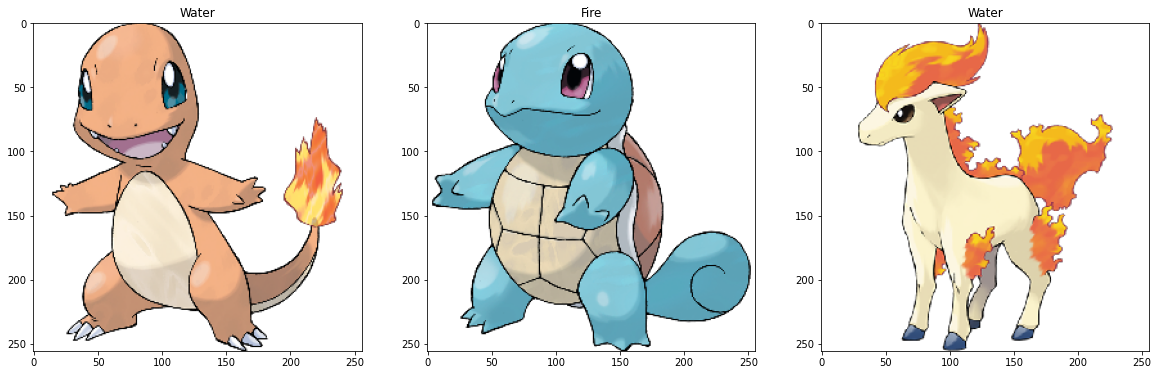

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
from PIL import Image
show_wrong_classification(y_test, predict_frame['category'], result)

* As we can see we have pokemons of different types badly classified but visually ignoring their animal characteristics they are similar in relation to their colors, so let's see how the pixel rgb channels are distributed among the fire and water pokemons



100%|██████████| 2/2 [01:45<00:00, 52.93s/it]


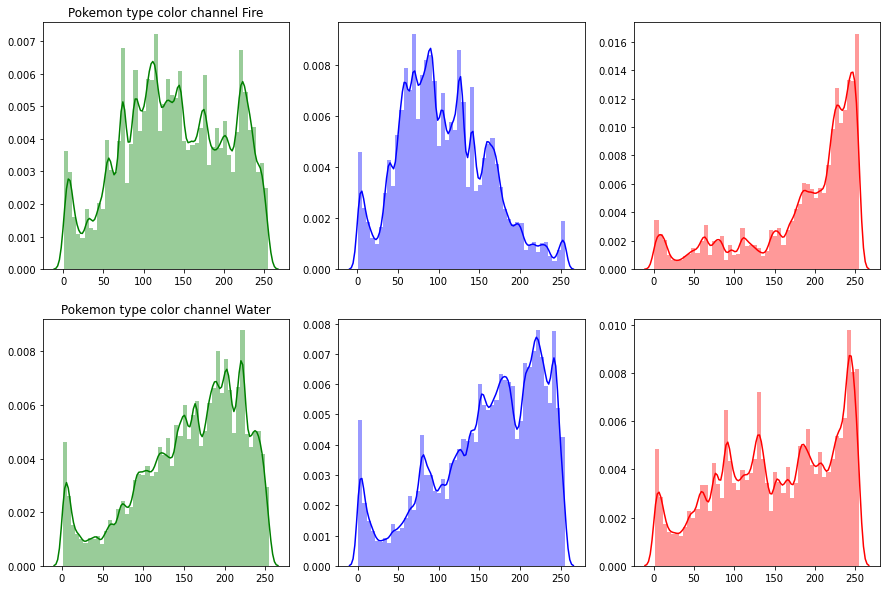

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,3,figsize=(15,10))
k =0
import cv2
list_b =[]
list_r = []
list_g = []
from tqdm import tqdm
for type_ in tqdm(result['Type1'].unique()):
    tmp = result[result['Type1']==type_]
    for img in tmp['images']:
        img = cv2.imread(img)
        b, g, r = cv2.split(img)
        color = 'blue'
        for i in b:
            for j in i:
                if j != 0:
                    list_b.append(j)
        color = 'green'
        for i in g:
            for j in i:
                if j != 0:
                    list_g.append(j)
        color = 'red'
        for i in r:
            for j in i:
                if j != 0:
                    list_r.append(j)
    sns.distplot(list_g, ax=axes[k, 0], color='g')
    sns.distplot(list_b, ax=axes[k, 1], color='b')
    sns.distplot(list_r, ax=axes[k, 2], color='r')
    axes[k, 0].set_title('Pokemon type color channel ' + type_)
    if type_ =='Fire':
        list_g_f = list_g
        list_b_f = list_b
        list_r_f = list_r
    else:
        list_g_w = list_g
        list_b_w = list_b
        list_r_w = list_r
    list_b =[]
    list_r = []
    list_g = []
    
    k += 1

* The distribution of pixels in the channels is similar, mainly between the green and red channels, the blue channel is the one with the most difference in its distribution where for fire type pokemon there is a low occurrence between 200 and 255 pixel value.


In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

g_fire = np.std(np.array(list_g_f), axis=0)
r_fire = np.std(np.array(list_r_f), axis=0)
b_fire = np.std(np.array(list_b_f), axis=0)


g_water = np.std(np.array(list_g_w), axis=0)
r_water = np.std(np.array(list_r_w), axis=0)
b_water = np.std(np.array(list_b_w), axis=0)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Fire std channel","Water std channel"))
fig.add_trace(go.Scatter(
    y=[b_fire, g_fire, g_fire],
    x=['blue', 'green', 'red'],
    mode='markers',
    marker=dict(size=[b_fire, g_fire, r_fire],
                color=['blue', 'green', 'red'],
                showscale=True)
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=[b_water, g_water, r_water],
    x=['blue', 'green', 'red'],
    mode='markers',
    marker=dict(size=[b_water, g_water, r_water],
                color=['blue', 'green', 'red'],
                showscale=True)
), row=1, col=2)
fig.update_layout(showlegend=False)
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'width': 850, 
        'height': 400

})
fig.show()

* Water pokemon has high std in red channel and fire has low std in blue channel. Thus the sensation that water type pokemons have a red presence which ends up mischaracterizing pokemons. So lets know identify pokemons that has red presence.


In [17]:
water = result[result['Type1']=='Water']
stds = []
values = []
for image in water['images']:
    img = cv2.imread(image)
    b, g, r = cv2.split(img)
    for i in r:
        for j in i:
            if j != 0:
                stds.append(j)       
    std = np.mean(np.array(stds), axis=0)
    values.append(std)
    stds = []
water['stds'] = values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
water = water.sort_values(by='stds', ascending=False)

* Lets see pokemons with higher averages in the red channel

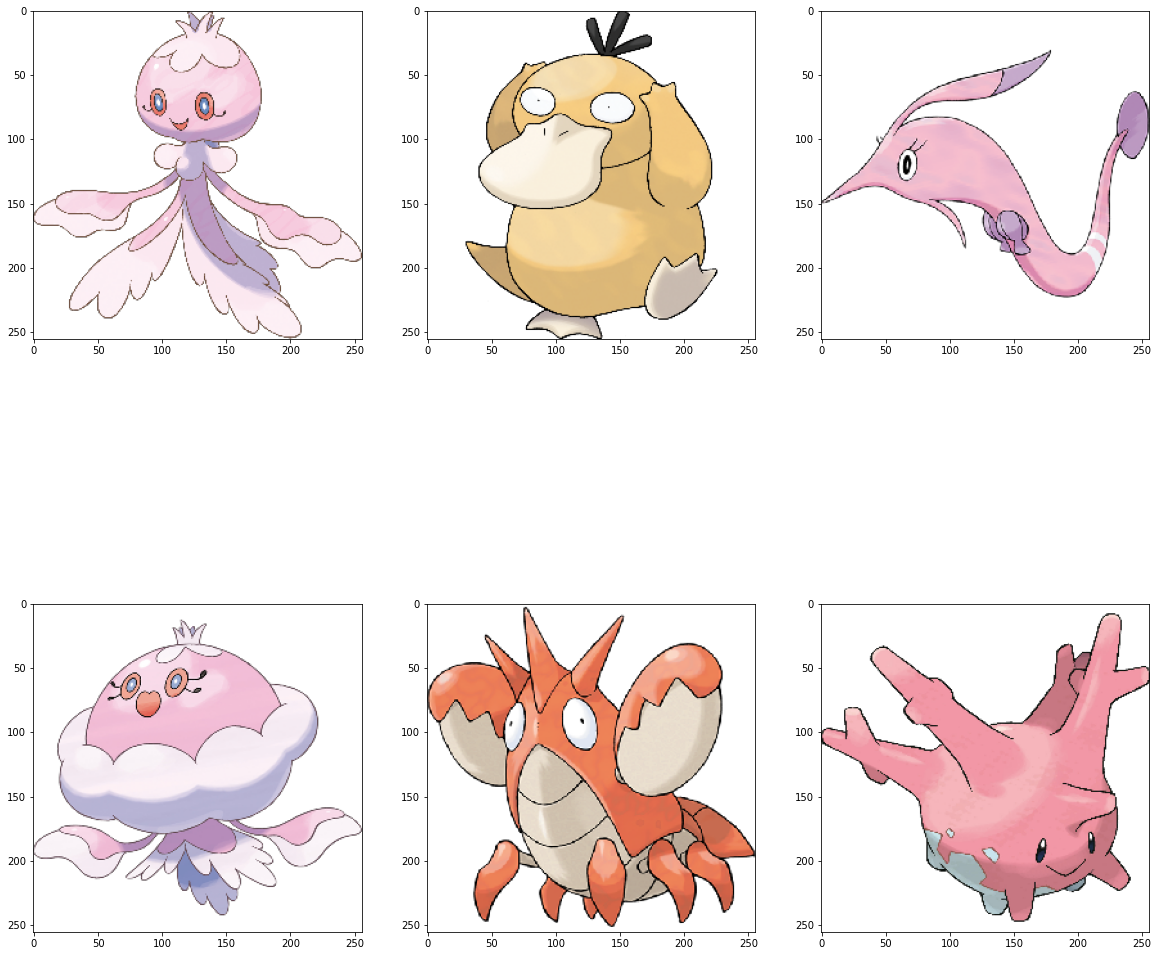

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [19]:
i = 0
j = 0
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
for imag in water['images']:
    if i == 1 and j ==3:
        break
    if j > 2:
        i =1
        j = 0
    img = Image.open(imag)
    fig = plt.figure()
    ax[i][j].imshow(img)
    j+=1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



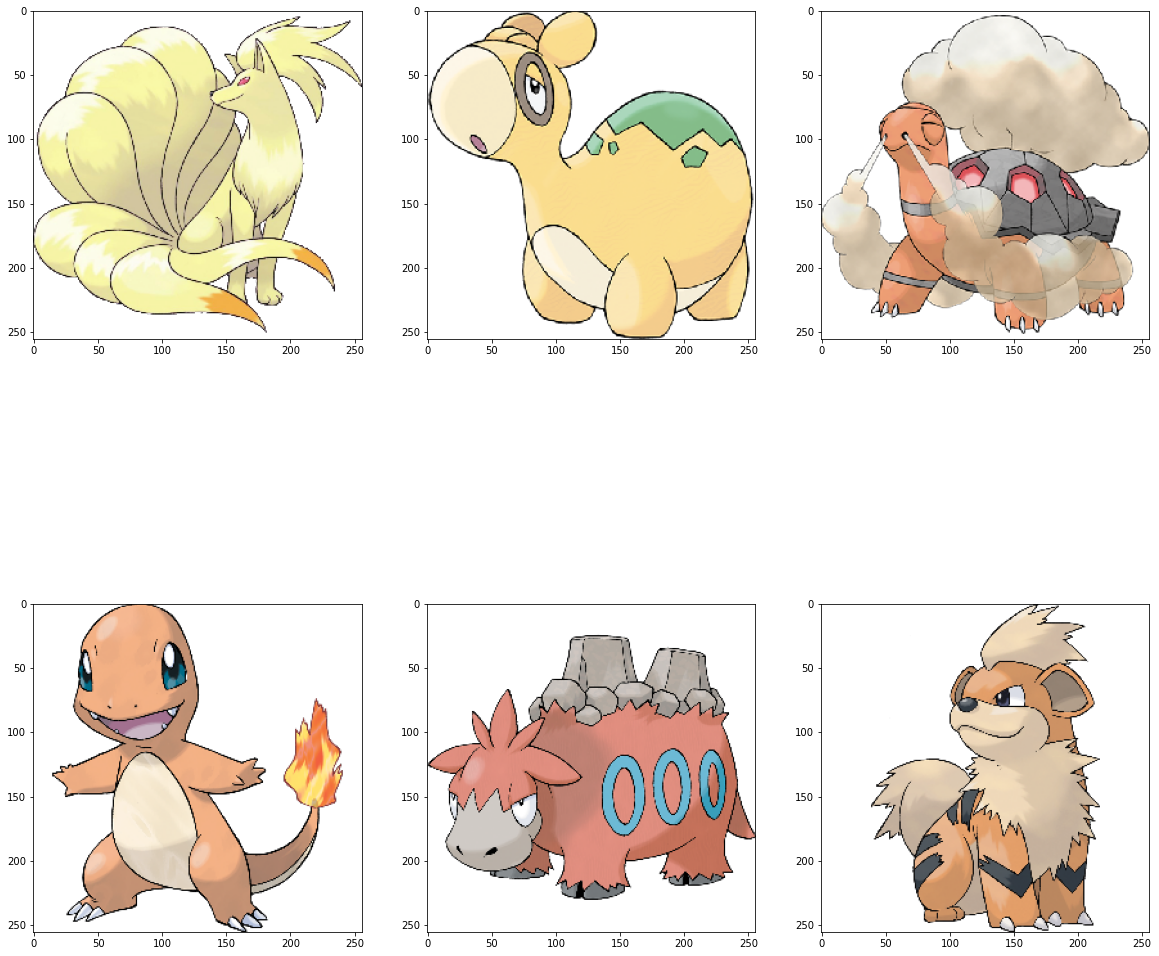

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [20]:
fire = result[result['Type1']=='Fire']
stds = []
values = []
for image in fire['images']:
    img = cv2.imread(image)
    b, g, r = cv2.split(img)
    for i in b:
        for j in i:
            if j != 0:
                stds.append(j)       
    std = np.mean(np.array(stds), axis=0)
    values.append(std)
    stds = []
fire['stds'] = values
fire = fire.sort_values(by='stds', ascending=False)
i = 0
j = 0
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
for imag in fire['images']:
    if i == 1 and j ==3:
        break
    if j > 2:
        i =1
        j = 0
    img = Image.open(imag)
    fig = plt.figure()
    ax[i][j].imshow(img)
    j+=1

<a id="4"></a> <br>
<font size="+3" color="black"><b>4 - Data Augmentation</b></font><br><a id="4"></a>
<br> 

* To try improve our result, i will apply some image augmentation

## brightness

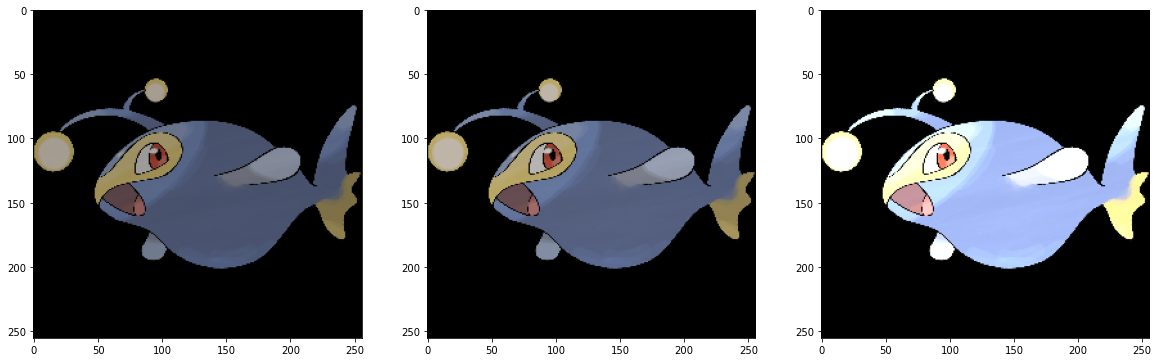

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [21]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
img = load_img(water['images'][170])
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.5])
it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
for i in range(3):
    fig = plt.figure()
    batch = it.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
pyplot.show()

## zoom

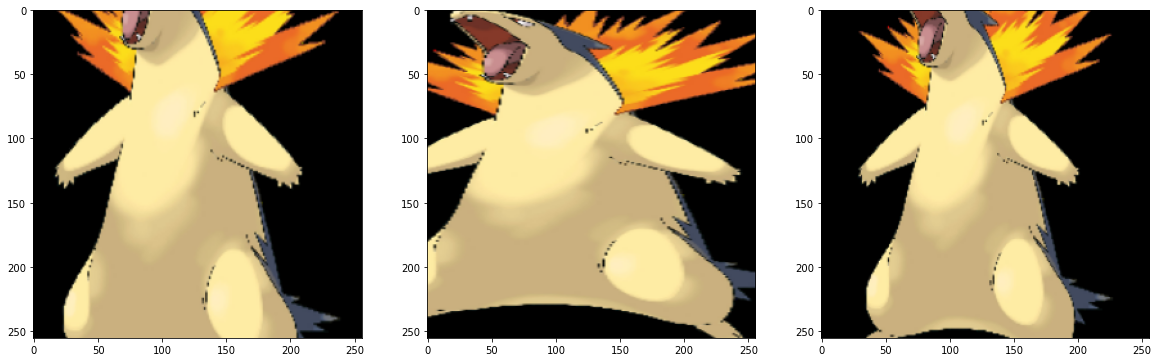

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [22]:
img = load_img(fire['images'][156])
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.5, 1.0])
it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
for i in range(3):
    fig = plt.figure()
    batch = it.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
pyplot.show()

## rotation

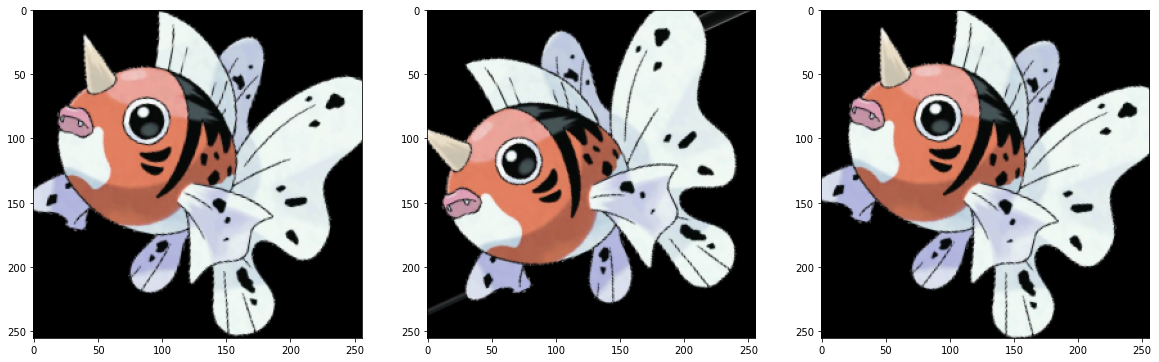

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
img = load_img(water['images'][118])
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=35)
it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
for i in range(3):
    fig = plt.figure()
    batch = it.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
pyplot.show()

In [24]:
datagentrain = ImageDataGenerator(rotation_range=35, 
                                 zoom_range=[0.5, 1.0], 
                                 brightness_range=[0.2,1.5])

datagen = ImageDataGenerator()

train = datagentrain.flow_from_directory('train/')
test = datagen.flow_from_directory('test/')
val = datagen.flow_from_directory('val/')

Found 100 images belonging to 2 classes.
Found 33 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [25]:
model = build()
history = model.fit_generator(train, epochs=30, validation_data=val)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 255, 255, 32)      416       
_________________________________________________________________
batch_normalization_4 (Batch (None, 255, 255, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 84, 84, 64)        8256      
_________________________________________________________________
batch_normalization_5 (Batch (None, 84, 84, 64)       

In [26]:
fig = go.Figure()
epochs = []
for i in range(len(history.history['acc'])):
    epochs.append(i)
fig.add_trace(go.Scatter(x=epochs,y=history.history['acc'], mode='lines',name='train'))
fig.add_trace(go.Scatter(x=epochs,y=history.history['val_acc'], mode='lines',name='val'))
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'width': 500, 
        'height': 400

})
fig.show()

In [27]:
predict_frame = pd.DataFrame([])
predict = model.predict_generator(test)
predict_frame['category'] = np.argmax(predict, axis=-1)
labels = dict((v,k) for k,v in val.class_indices.items())
predict_frame['category'] = predict_frame['category'].replace(labels)
print(classification_report(y_test, predict_frame['category']))

              precision    recall  f1-score   support

        Fire       0.45      0.45      0.45        11
       Water       0.73      0.73      0.73        22

    accuracy                           0.64        33
   macro avg       0.59      0.59      0.59        33
weighted avg       0.64      0.64      0.64        33



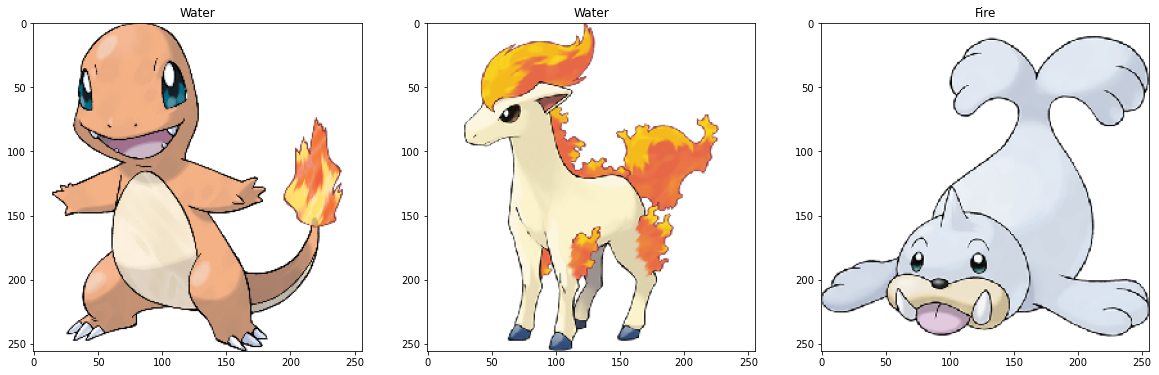

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [28]:
show_wrong_classification(y_test, predict_frame['category'], result)

* So a classification of the fire type pokemon is impaired due to the red channel of the water type pokemon being very difficult to perform the classification correctly even with augmentation
